# 01-CIFAR10

![](https://images.unsplash.com/photo-1493723843671-1d655e66ac1c?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [LUM3N](https://unsplash.com/photos/-RBuQ2PK_L8)


We will work on the CIFAR10 dataset. If you want to know more about this dataset, you can check information [here](https://www.cs.toronto.edu/~kriz/cifar.html).

You can download the CIFAR10 dataset using Keras. To know how to do it, check [here](https://keras.io/datasets/). If the memory of your laptop is not big (e.g. 4GB), take only a subsample of the CIFAR10 dataset: for example 10000 samples in train and 2000 in test.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# TODO: Load the dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

Now inspect the data, check the number of images, their sizes, and display some of them.

In [4]:
# TODO: Explore the data, display some input images
X_train.shape

(50000, 32, 32, 3)

In [5]:
map_labels = {
    0: 'airplane',
    1: 'automobile', 
    2: 'bird', 
    3: 'cat', 
    4: 'deer', 
    5: 'dog',
    6: 'frog', 
    7: 'horse', 
    8: 'ship',
    9: 'truck'
}

**Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.**

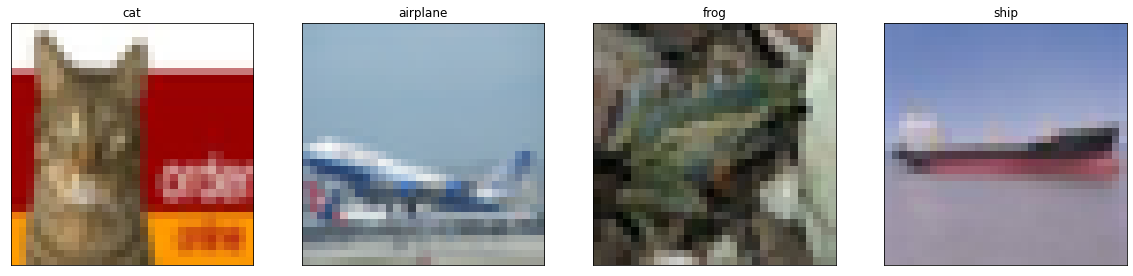

In [6]:
size = 4
sample_graph = np.random.randint(0,50000, size)

sample_images = X_train[sample_graph]
sample_labels = y_train[sample_graph]

plt.figure(figsize = (20,10))

ax =[]

for i in range(1,size+1):
    ax.append(plt.subplot(size // 4 + 1,4,i))
    plt.imshow(sample_images[i-1])
    ax[i-1].title.set_text(map_labels[sample_labels[i-1][0]])
    ax[i-1].set_xticks([])
    ax[i-1].set_yticks([])

plt.show()

Make the data preprocessing now: rescale the input data, put the labels to one hot encoding.

In [7]:
# TODO: Make the data preparation
X_train_rs = X_train.reshape(50000,-1)/255
X_test_rs = X_test.reshape(10000,-1)/255

In [8]:
y_train_rs = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_rs = tf.keras.utils.to_categorical(y_test, num_classes=10)

Now build your model with Keras. Build your neural network architecture.

Again, begin with a quite light architecture with 3 hidden layers and 30 units per layer.

In [9]:
# TODO: Build your model
def mlp_model(input_dim):
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(30, input_dim=input_dim, activation='relu'))
    model.add(tf.keras.layers.Dense(30, activation='relu'))
    model.add(tf.keras.layers.Dense(30, activation='relu'))
    model.add(tf.keras.layers.Dense(30, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    return model

Now compile and fit your model on your training data. Add callbacks to have early stopping (with a patience of 30 epochs for example) and tensorboard information.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train_rs, y_train_rs, test_size=.2, stratify=y_train, random_state=42)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
callback = [EarlyStopping(monitor='val_loss', patience=30),
            TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)]

In [13]:
# TODO: Build your model
model = mlp_model(X_train_rs.shape[1])

In [14]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_tr, y_tr, batch_size=200, epochs=1000, validation_data=(X_val, y_val), callbacks = callback, use_multiprocessing=True)

Epoch 1/1000
  1/200 [..............................] - ETA: 0s - loss: 2.3200 - accuracy: 0.0650WARNING:tensorflow:From /home/guillaume/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
200/200 [==============================] - 1s 5ms/step - loss: 2.0948 - accuracy: 0.2019 - val_loss: 1.9541 - val_accuracy: 0.2726
Epoch 2/1000
200/200 [==============================] - 1s 3ms/step - loss: 1.9112 - accuracy: 0.2912 - val_loss: 1.8839 - val_accuracy: 0.3057
Epoch 3/1000
200/200 [==============================] - 1s 3ms/step - loss: 1.8644 - accuracy: 0.3159 - val_loss: 1.8474 - val_accuracy: 0.3295
Epoch 4/1000
200/200 [==============================] - 1s 3ms/step - loss: 1.8278 - accuracy: 0.3333 - val_loss: 1.8237 - val_accuracy: 0.3437
Epoch 5/1000
200/200 

200/200 [==============================] - 1s 3ms/step - loss: 1.5782 - accuracy: 0.4327 - val_loss: 1.6662 - val_accuracy: 0.4055
Epoch 54/1000
200/200 [==============================] - 1s 3ms/step - loss: 1.5763 - accuracy: 0.4332 - val_loss: 1.6556 - val_accuracy: 0.4084
Epoch 55/1000
200/200 [==============================] - 1s 3ms/step - loss: 1.5735 - accuracy: 0.4327 - val_loss: 1.6496 - val_accuracy: 0.4119
Epoch 56/1000
200/200 [==============================] - 1s 3ms/step - loss: 1.5782 - accuracy: 0.4298 - val_loss: 1.6935 - val_accuracy: 0.3990
Epoch 57/1000
200/200 [==============================] - 1s 3ms/step - loss: 1.5791 - accuracy: 0.4314 - val_loss: 1.6613 - val_accuracy: 0.4083
Epoch 58/1000
200/200 [==============================] - 1s 3ms/step - loss: 1.5707 - accuracy: 0.4363 - val_loss: 1.6579 - val_accuracy: 0.4077
Epoch 59/1000
200/200 [==============================] - 1s 3ms/step - loss: 1.5722 - accuracy: 0.4338 - val_loss: 1.6603 - val_accuracy: 0.4114

Compute the accuracy of your model once it has been trained.

In [15]:
# TODO: Compute the accuracy of your model
loss, acc = model.evaluate(X_test_rs, y_test_rs)

print(f'Accuracy: {acc}')

313/313 [==============================] - 0s 1ms/step - loss: 1.6579 - accuracy: 0.4058
Accuracy: 0.4058000147342682


What do you think of those results? Can you improve it by changing the number of layers? Of units per layer? The number of epochs? Feel free to try.

To have a better understanding of your model, you can also check the learning curves on TensorBoard and interpret them.

One solution to improve your model might be data augmentation. For example, we can flip horizontally our images. Basically, this would be like watching them into a mirror.

To do so, you can use numpy method `flip` for example, and then display a flipped image and the regular image.

In [16]:
# TODO: Augment your data by flipping images horizontally
X_train_flipped = np.fliplr(X_train)

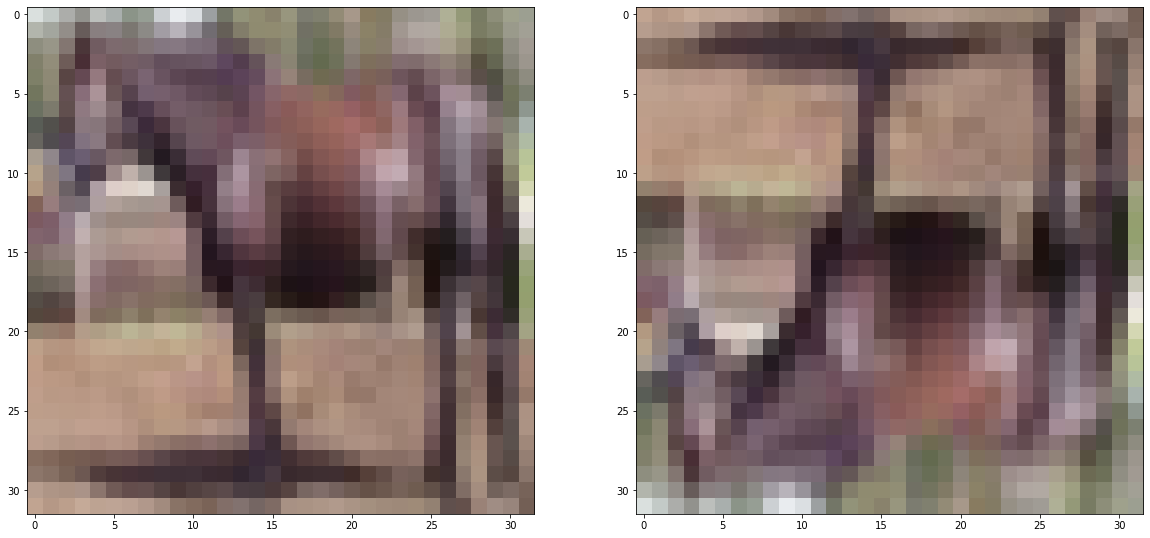

In [17]:
sample = np.random.randint(0,50000)

sample_image = X_train[sample]
sample_image_flipped = X_train_flipped[sample]

plt.figure(figsize = (20,10))

plt.subplot(121)
plt.imshow(sample_image)
plt.subplot(122)
plt.imshow(sample_image_flipped)

plt.show()

Now concatenate your training set to have both regular and flipped images in it. Do the same for the associated labels (labels remain the same for flipped images). If your computer memory is not big enough, flip only a subsample of images.

In [18]:
# TODO: Create a new training set with both regular and flipped images
X_train_full = np.concatenate((X_train[:20000], X_train_flipped[:20000]), axis=0)

In [19]:
y_train_full = np.concatenate((y_train[:20000], y_train[:20000]), axis=0)

In [ ]:
X_train_full_rs = X_train_full.reshape(60000,-1)/255

Once your data is augmented, retrain your model, and see if it can improve your performances.

In [ ]:
# TODO: train your model and display the performances
X_tr, X_val, y_tr, y_val = train_test_split(X_train_full_rs, y_train_full, test_size=.2, stratify=y_train, random_state=42)

Does it improve your performances? On my side yes it does, from 34% accuracy to 41%, quite a big improvement (even if this is not so good).

Now feel free to improve the performances of your model by making more data augmentation (adding rotations, zooming...), trying to add layers or units, or playing with hyperparameters.